## Aggregated Open-loop results

As a function of ctgs0

In [1]:
import os
import sys

root_folder = os.path.abspath(os.getcwd())
sys.path.append(root_folder)

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib ipympl

case_study = ['quadrotor','freeflyer','rpod','aggr']
an = []
an.append(np.load(root_folder + '/drone/optimization/saved_files/warmstarting/ws_analysis_checkpoint_quad_random_forest_ctgrtg_vs_dag_dyn.npz', allow_pickle=True))
an.append(np.load(root_folder + '/freeflyer/optimization/saved_files/warmstarting/ws_analysis_checkpoint_ff_ctgrtg_art_vs_dag_dyn_test.npz', allow_pickle=True))
an.append(np.load(root_folder + '/rpod/optimization/saved_files/warmstarting/ws_analysis_checkpoint_rtn_ctgrtg_vs_dag_dyn.npz', allow_pickle=True))

J_vect_scp_cvx = []
J_vect_scp_dag = []
J_vect_scp_DT = []
J_cvx = []
J_DT = []
iter_scp_cvx = []
iter_scp_dag = []
iter_scp_DT = []
runtime_cvx = []
runtime_DT = []
runtime_scp_cvx = []
runtime_scp_dag = []
runtime_scp_DT = []
ctgs0_cvx = []
cvx_problem = []
ix = []
i_unfeas_cvx = []
i_unfeas_scp_cvx = []
i_unfeas_scp_dag = []
i_unfeas_scp_DT = []
for i in range(len(an)):
    traj_data = an[i]    
    n = len(traj_data['test_dataset_ix'])
    J_vect_scp_cvx.append(traj_data['J_vect_scp_cvx'][:n])
    J_vect_scp_dag.append(traj_data['J_vect_scp_dag'][:n])# if i !=1 else traj_data['J_vect_scp_DT'])
    J_vect_scp_DT.append( traj_data['J_vect_scp_DT'][:n])
    J_cvx.append( traj_data['J_cvx'][:n])
    J_DT.append( traj_data['J_DT'][:n])
    iter_scp_cvx.append( traj_data['iter_scp_cvx'][:n])
    iter_scp_dag.append( traj_data['iter_scp_dag'][:n])# if i !=1 else traj_data['iter_scp_DT'])
    iter_scp_DT.append( traj_data['iter_scp_DT'][:n])
    runtime_cvx.append( traj_data['runtime_cvx'][:n])
    runtime_DT.append( traj_data['runtime_DT'][:n])
    runtime_scp_cvx.append( traj_data['runtime_scp_cvx'][:n])
    runtime_scp_dag.append( traj_data['runtime_scp_dag'][:n])# if i !=1 else traj_data['runtime_scp_DT'])
    runtime_scp_DT.append( traj_data['runtime_scp_DT'][:n])
    ctgs0_cvx.append( traj_data['ctgs0_cvx'][:n])
    cvx_problem.append( traj_data['cvx_problem'][:n])
    ix.append( np.arange(len(traj_data['test_dataset_ix'][:n])))
    i_unfeas_cvx.append( traj_data['i_unfeas_cvx'][:n])
    i_unfeas_scp_cvx.append( traj_data['i_unfeas_scp_cvx'][:n])
    i_unfeas_scp_dag.append( traj_data['i_unfeas_scp_dag'][:n])# if i !=1 else traj_data['i_unfeas_scp_DT'])
    i_unfeas_scp_DT.append( traj_data['i_unfeas_DT'][:n])
'''test_dataset_ix = ix
J_vect_scp_cvx = traj_data['J_vect_scp_cvx'][:n]
J_vect_scp_DT =  traj_data['J_vect_scp_DT'][:n]
J_cvx =  traj_data['J_cvx'][:n]
J_DT =  traj_data['J_DT'][:n]
iter_scp_cvx =  traj_data['iter_scp_cvx'][:n]
iter_scp_DT =  traj_data['iter_scp_DT'][:n]
runtime_cvx =  traj_data['runtime_cvx'][:n]
runtime_DT =  traj_data['runtime_DT'][:n]
runtime_scp_cvx =  traj_data['runtime_scp_cvx'][:n]
runtime_scp_DT =  traj_data['runtime_scp_DT'][:n]
ctgs0_cvx =  traj_data['ctgs0_cvx'][:n]
cvx_problem =  traj_data['cvx_problem'][:n]
test_dataset_ix =  np.arange(len(traj_data['test_dataset_ix'][:n]))
i_unfeas_cvx =  traj_data['i_unfeas_cvx'][:n]
i_unfeas_scp_cvx =  traj_data['i_unfeas_scp_cvx'][:n]
i_unfeas_DT =  traj_data['i_unfeas_DT'][:n]
x_init = traj_data['state_init']
x_final = traj_data['state_final']'''

"test_dataset_ix = ix\nJ_vect_scp_cvx = traj_data['J_vect_scp_cvx'][:n]\nJ_vect_scp_DT =  traj_data['J_vect_scp_DT'][:n]\nJ_cvx =  traj_data['J_cvx'][:n]\nJ_DT =  traj_data['J_DT'][:n]\niter_scp_cvx =  traj_data['iter_scp_cvx'][:n]\niter_scp_DT =  traj_data['iter_scp_DT'][:n]\nruntime_cvx =  traj_data['runtime_cvx'][:n]\nruntime_DT =  traj_data['runtime_DT'][:n]\nruntime_scp_cvx =  traj_data['runtime_scp_cvx'][:n]\nruntime_scp_DT =  traj_data['runtime_scp_DT'][:n]\nctgs0_cvx =  traj_data['ctgs0_cvx'][:n]\ncvx_problem =  traj_data['cvx_problem'][:n]\ntest_dataset_ix =  np.arange(len(traj_data['test_dataset_ix'][:n]))\ni_unfeas_cvx =  traj_data['i_unfeas_cvx'][:n]\ni_unfeas_scp_cvx =  traj_data['i_unfeas_scp_cvx'][:n]\ni_unfeas_DT =  traj_data['i_unfeas_DT'][:n]\nx_init = traj_data['state_init']\nx_final = traj_data['state_final']"

In [2]:
for i in range(len(an)):
    print('========= CASE STUDY ' + case_study[i])
    print('Unfeasible cvx: ', len(i_unfeas_cvx[i]))
    print('Unfeasible scp-cvx: ', len(i_unfeas_scp_cvx[i]))
    print('Unfeasible scp-dag: ', len(i_unfeas_scp_dag[i]))
    print('Unfeasible scp-tto: ', len(i_unfeas_scp_DT[i]))

========= CASE STUDY quadrotor
Unfeasible cvx:  0
Unfeasible scp-cvx:  0
Unfeasible scp-dag:  0
Unfeasible scp-tto:  0
========= CASE STUDY freeflyer
Unfeasible cvx:  0
Unfeasible scp-cvx:  4880
Unfeasible scp-dag:  2
Unfeasible scp-tto:  151
========= CASE STUDY rpod
Unfeasible cvx:  11
Unfeasible scp-cvx:  52
Unfeasible scp-dag:  97
Unfeasible scp-tto:  93


In [3]:
ix_non_cvx_comp = []
J_cvx_comp = []
J_scp_cvx_comp = []
J_scp_dag_comp = []
J_scp_DT_comp = []
iter_scp_cvx_comp = []
iter_scp_dag_comp = []
iter_scp_DT_comp = []
ctgs0_cvx_comp = []
for i in range(len(an)):
    print('========= CASE STUDY ' + case_study[i])
    ix_unfeas = set(i_unfeas_cvx[i]).union(set(i_unfeas_scp_cvx[i])).union(set(i_unfeas_scp_DT[i])).union(set(i_unfeas_scp_dag[i]))#.union(set(ix[i][J_vect_scp_dag[i].min(axis=1) >= 5]))
    ix_feas_comparison = set(ix[i]) - ix_unfeas#.union(set(np.random.choice(np.arange(40000),18000,replace=False)) if case_study[i] == 'drone' else set([]))
    print('Feasible samples for comparison', len(ix_feas_comparison))
    ctgs_selector = (ctgs0_cvx[i] >= 0)# & (ctgs0_cvx[i] <= 60)
    ix_non_cvx = set(ix[i][ctgs_selector])
    print('Samples with ctgs0 > 0', len(ix_non_cvx))
    ix_non_cvx_comp.append(ix_feas_comparison.intersection(ix_non_cvx))
    print('Samples with ctgs0 of interest for comparison', len(ix_non_cvx_comp[i]))

    # Delete the non-necessary values
    J_cvx_comp.append(J_cvx[i][list(ix_non_cvx_comp[i])])
    J_scp_cvx_comp.append(J_vect_scp_cvx[i][list(ix_non_cvx_comp[i])].min(axis=1))
    J_scp_dag_comp.append(J_vect_scp_dag[i][list(ix_non_cvx_comp[i])].min(axis=1))
    J_scp_DT_comp.append(J_vect_scp_DT[i][list(ix_non_cvx_comp[i])].min(axis=1))
    iter_scp_cvx_comp.append(iter_scp_cvx[i][list(ix_non_cvx_comp[i])])
    iter_scp_dag_comp.append(iter_scp_dag[i][list(ix_non_cvx_comp[i])])
    iter_scp_DT_comp.append(iter_scp_DT[i][list(ix_non_cvx_comp[i])])
    ctgs0_cvx_comp.append(ctgs0_cvx[i][list(ix_non_cvx_comp[i])])

'''for i in range(len((an))):
    #if case_study[i] == 'rpod':
    #    bound_2_good = -5#0
    #else:
    bound_2_good = -np.percentile(J_scp_cvx_comp[i] - J_cvx_comp[i],0)#J_scp_cvx_comp[i]#
    bound_2_bad = np.percentile(J_scp_cvx_comp[i] - J_cvx_comp[i],100)
    ix_not_outliers = np.arange(len(J_cvx_comp[i]))[((J_scp_cvx_comp[i] - J_cvx_comp[i]) >= bound_2_good) & ((J_scp_cvx_comp[i] - J_cvx_comp[i]) <= bound_2_bad)]
    # Delete the non-necessary values
    J_cvx_comp[i] = J_cvx_comp[i][list(ix_not_outliers)]
    J_scp_cvx_comp[i] = J_scp_cvx_comp[i][list(ix_not_outliers)]
    J_scp_DT_comp[i] = J_scp_DT_comp[i][list(ix_not_outliers)]
    iter_scp_cvx_comp[i] = iter_scp_cvx_comp[i][list(ix_not_outliers)]
    iter_scp_DT_comp[i] = iter_scp_DT_comp[i][list(ix_not_outliers)]
    ctgs0_cvx_comp[i] = ctgs0_cvx_comp[i][list(ix_not_outliers)]'''


========= CASE STUDY quadrotor
Feasible samples for comparison 40000
Samples with ctgs0 > 0 40000
Samples with ctgs0 of interest for comparison 40000
========= CASE STUDY freeflyer
Feasible samples for comparison 29247
Samples with ctgs0 > 0 34217
Samples with ctgs0 of interest for comparison 29247
========= CASE STUDY rpod
Feasible samples for comparison 39578
Samples with ctgs0 > 0 39758
Samples with ctgs0 of interest for comparison 39578


"for i in range(len((an))):\n    #if case_study[i] == 'rpod':\n    #    bound_2_good = -5#0\n    #else:\n    bound_2_good = -np.percentile(J_scp_cvx_comp[i] - J_cvx_comp[i],0)#J_scp_cvx_comp[i]#\n    bound_2_bad = np.percentile(J_scp_cvx_comp[i] - J_cvx_comp[i],100)\n    ix_not_outliers = np.arange(len(J_cvx_comp[i]))[((J_scp_cvx_comp[i] - J_cvx_comp[i]) >= bound_2_good) & ((J_scp_cvx_comp[i] - J_cvx_comp[i]) <= bound_2_bad)]\n    # Delete the non-necessary values\n    J_cvx_comp[i] = J_cvx_comp[i][list(ix_not_outliers)]\n    J_scp_cvx_comp[i] = J_scp_cvx_comp[i][list(ix_not_outliers)]\n    J_scp_DT_comp[i] = J_scp_DT_comp[i][list(ix_not_outliers)]\n    iter_scp_cvx_comp[i] = iter_scp_cvx_comp[i][list(ix_not_outliers)]\n    iter_scp_DT_comp[i] = iter_scp_DT_comp[i][list(ix_not_outliers)]\n    ctgs0_cvx_comp[i] = ctgs0_cvx_comp[i][list(ix_not_outliers)]"

In [4]:
J_scp_cvx_norm = []
J_scp_dag_norm = []
J_scp_DT_norm = []
for i in np.arange(len(an)):#range(len(an)):
    lower_bound = 0
    upper_bound = 1
    J_scp_cvx_norm.append((J_scp_cvx_comp[i] - lower_bound)/upper_bound)
    J_scp_dag_norm.append((J_scp_dag_comp[i] - lower_bound)/upper_bound)
    J_scp_DT_norm.append((J_scp_DT_comp[i] - lower_bound)/upper_bound)

In [6]:
mean_costs_list = []
std_costs_list = []
mean_iter_list = []
n_unfeas_list = []
ctgs0_set = []
ctgs0_count = []
ctgs0_list = []
ctgs0_min = 0
ctgs0_max= 51
ctgs_step = 1
for i in range(len(an)):
    print('========= CASE STUDY ' + case_study[i])
    # Ordered results for ctgs0
    ctgs0_set.append(set(ctgs0_cvx_comp[i]))
    #ctgs0_set.append(np.arange(ctgs0_min,ctgs0_max, ctgs_step))
    ctgs0_list.append(np.array(list(ctgs0_set[i])))#np.arange(ctgs0_min,ctgs0_max, ctgs_step))
    mean_costs_list.append({
        'scp-cvx' : np.zeros((len(ctgs0_set[i],))),
        'scp-dag' : np.zeros((len(ctgs0_set[i],))),
        'scp-DT' : np.zeros((len(ctgs0_set[i],)))
    })
    std_costs_list.append({
        'scp-cvx' : np.zeros((len(ctgs0_set[i],))),
        'scp-dag' : np.zeros((len(ctgs0_set[i],))),
        'scp-DT' : np.zeros((len(ctgs0_set[i],)))
    })
    mean_iter_list.append({
        'scp-cvx' : np.zeros((len(ctgs0_set[i]),)),
        'scp-dag' : np.zeros((len(ctgs0_set[i],))),
        'scp-DT' : np.zeros((len(ctgs0_set[i]),))
    })
    n_unfeas_list.append({
        'scp-cvx' : np.zeros((len(ctgs0_set[i]),)),
        'scp-dag' : np.zeros((len(ctgs0_set[i],))),
        'scp-DT' : np.zeros((len(ctgs0_set[i]),))
    })
    ctgs0_count.append(np.zeros((len(ctgs0_set[i],))))
    for j,ctg in enumerate(ctgs0_set[i]):
        scale = 1
        idx_ctg = (ctgs0_cvx_comp[i] >= ctg)
        
        scpDT_cvx = (J_scp_DT_norm[i][idx_ctg] - J_cvx_comp[i][idx_ctg]).mean()
        scpDT_cvx_std = (J_scp_DT_norm[i][idx_ctg] - J_cvx_comp[i][idx_ctg]).std()
        scpcvx_cvx = (J_scp_cvx_norm[i][idx_ctg] - J_cvx_comp[i][idx_ctg]).mean()
        scpcvx_cvx_std = (J_scp_cvx_norm[i][idx_ctg] - J_cvx_comp[i][idx_ctg]).std()
        scpdag_cvx = (J_scp_dag_norm[i][idx_ctg] - J_cvx_comp[i][idx_ctg]).mean()
        scpdag_cvx_std = (J_scp_dag_norm[i][idx_ctg] - J_cvx_comp[i][idx_ctg]).std()
        mean_costs_list[i]['scp-cvx'][j] = scpcvx_cvx/scpcvx_cvx*scale
        mean_costs_list[i]['scp-DT'][j] = scpDT_cvx/scpcvx_cvx*scale
        mean_costs_list[i]['scp-dag'][j] = scpdag_cvx/scpcvx_cvx

        # Iter
        mean_iter_list[i]['scp-cvx'][j] = (iter_scp_cvx_comp[i][idx_ctg].mean())/(iter_scp_cvx_comp[i][idx_ctg].mean())
        mean_iter_list[i]['scp-dag'][j] = (iter_scp_dag_comp[i][idx_ctg].mean())/(iter_scp_cvx_comp[i][idx_ctg].mean())
        mean_iter_list[i]['scp-DT'][j] = (iter_scp_DT_comp[i][idx_ctg].mean())/(iter_scp_cvx_comp[i][idx_ctg].mean())
        ctgs0_count[i][j] = idx_ctg.sum()

        # Unfeas
        i_ctg2 = list(set(ix[i][ctgs0_cvx[i]>=ctg]))

        i_unfeas_scp_cvx_ctg = list(set(i_unfeas_scp_cvx[i]).intersection(set(i_ctg2)))
        i_unfeas_scp_DT_ctg = list(set(i_unfeas_scp_DT[i]).intersection(set(i_ctg2)))
        i_unfeas_scp_dag_ctg = list(set(i_unfeas_scp_dag[i]).intersection(set(i_ctg2)))
        
        n_unfeas_list[i]['scp-cvx'][j] = (len(i_unfeas_scp_cvx_ctg)/len(i_ctg2))*100
        n_unfeas_list[i]['scp-DT'][j] = (len(i_unfeas_scp_DT_ctg)/len(i_ctg2))*100
        n_unfeas_list[i]['scp-dag'][j] = (len(i_unfeas_scp_dag_ctg)/len(i_ctg2))*100


========= CASE STUDY quadrotor
========= CASE STUDY freeflyer
========= CASE STUDY rpod


In [8]:
ctgs0_4_mean = []
mean_costs_list_4_mean = []
mean_iter_list_4_mean = []
n_unfeas_list_4_mean = []
ctgs0_min = 0
ctgs0_max= 50
ctgs_step = 1
for i in range(len(an)+1):
    ctgs0_4_mean.append(np.arange(ctgs0_min, ctgs0_max+0.01, ctgs_step)/ctgs0_max)
    mean_costs_list_4_mean.append({
        'scp-cvx' : np.zeros((len(ctgs0_4_mean[i],))),
        'scp-dag' : np.zeros((len(ctgs0_4_mean[i],))),
        'scp-DT' : np.zeros((len(ctgs0_4_mean[i],)))
    })
    mean_iter_list_4_mean.append({
        'scp-cvx' : np.zeros((len(ctgs0_4_mean[i],))),
        'scp-dag' : np.zeros((len(ctgs0_4_mean[i],))),
        'scp-DT' : np.zeros((len(ctgs0_4_mean[i],)))
    })
    n_unfeas_list_4_mean.append({
        'scp-cvx' : np.zeros((len(ctgs0_4_mean[i],))),
        'scp-dag' : np.zeros((len(ctgs0_4_mean[i],))),
        'scp-DT' : np.zeros((len(ctgs0_4_mean[i],)))
    })
    if case_study[i] == 'aggr':
        mean_costs_list_4_mean[i]['scp-cvx'] = (mean_costs_list_4_mean[0]['scp-cvx'] + mean_costs_list_4_mean[1]['scp-cvx'] + mean_costs_list_4_mean[2]['scp-cvx'])/3
        mean_costs_list_4_mean[i]['scp-dag'] = (mean_costs_list_4_mean[0]['scp-dag'] + mean_costs_list_4_mean[1]['scp-dag'] + mean_costs_list_4_mean[2]['scp-dag'])/3
        mean_costs_list_4_mean[i]['scp-DT'] = (mean_costs_list_4_mean[0]['scp-DT'] + mean_costs_list_4_mean[1]['scp-DT'] + mean_costs_list_4_mean[2]['scp-DT'])/3
        mean_iter_list_4_mean[i]['scp-cvx'] = (mean_iter_list_4_mean[0]['scp-cvx'] + mean_iter_list_4_mean[1]['scp-cvx'] + mean_iter_list_4_mean[2]['scp-cvx'])/3
        mean_iter_list_4_mean[i]['scp-dag'] = (mean_iter_list_4_mean[0]['scp-dag'] + mean_iter_list_4_mean[1]['scp-dag'] + mean_iter_list_4_mean[2]['scp-dag'])/3
        mean_iter_list_4_mean[i]['scp-DT'] = (mean_iter_list_4_mean[0]['scp-DT'] + mean_iter_list_4_mean[1]['scp-DT'] + mean_iter_list_4_mean[2]['scp-DT'])/3
        n_unfeas_list_4_mean[i]['scp-cvx'] = (n_unfeas_list_4_mean[0]['scp-cvx'] + n_unfeas_list_4_mean[1]['scp-cvx'] + n_unfeas_list_4_mean[2]['scp-cvx'])/3
        n_unfeas_list_4_mean[i]['scp-dag'] = (n_unfeas_list_4_mean[0]['scp-dag'] + n_unfeas_list_4_mean[1]['scp-dag'] + n_unfeas_list_4_mean[2]['scp-dag'])/3
        n_unfeas_list_4_mean[i]['scp-DT'] = (n_unfeas_list_4_mean[0]['scp-DT'] + n_unfeas_list_4_mean[1]['scp-DT'] + n_unfeas_list_4_mean[2]['scp-DT'])/3
    else:
        if ctgs0_cvx_comp[i].max() < ctgs0_max:
            f_scp_cvx = interp1d((ctgs0_list[i][:-1]-1)/(ctgs0_list[i][:-1].max()-1), mean_costs_list[i]['scp-cvx'][:-1])
            f_scp_dag = interp1d((ctgs0_list[i][:-1]-1)/(ctgs0_list[i][:-1].max()-1), mean_costs_list[i]['scp-dag'][:-1])
            f_scp_DT = interp1d((ctgs0_list[i][:-1]-1)/(ctgs0_list[i][:-1].max()-1), mean_costs_list[i]['scp-DT'][:-1])
            mean_costs_list_4_mean[i]['scp-cvx'] = f_scp_cvx(ctgs0_4_mean[i])
            mean_costs_list_4_mean[i]['scp-dag'] = f_scp_dag(ctgs0_4_mean[i])
            mean_costs_list_4_mean[i]['scp-DT'] = f_scp_DT(ctgs0_4_mean[i])
            f_iter_scp_cvx = interp1d((ctgs0_list[i][:-1]-1)/(ctgs0_list[i][:-1].max()-1), mean_iter_list[i]['scp-cvx'][:-1])
            f_iter_scp_dag = interp1d((ctgs0_list[i][:-1]-1)/(ctgs0_list[i][:-1].max()-1), mean_iter_list[i]['scp-dag'][:-1])
            f_iter_scp_DT = interp1d((ctgs0_list[i][:-1]-1)/(ctgs0_list[i][:-1].max()-1), mean_iter_list[i]['scp-DT'][:-1])
            mean_iter_list_4_mean[i]['scp-cvx'] = f_iter_scp_cvx(ctgs0_4_mean[i])
            mean_iter_list_4_mean[i]['scp-dag'] = f_iter_scp_dag(ctgs0_4_mean[i])
            mean_iter_list_4_mean[i]['scp-DT'] = f_iter_scp_DT(ctgs0_4_mean[i])
            f_unfeas_scp_cvx = interp1d((ctgs0_list[i][:-1]-1)/(ctgs0_list[i][:-1].max()-1), n_unfeas_list[i]['scp-cvx'][:-1])
            f_unfeas_scp_dag = interp1d((ctgs0_list[i][:-1]-1)/(ctgs0_list[i][:-1].max()-1), n_unfeas_list[i]['scp-dag'][:-1])
            f_unfeas_scp_DT = interp1d((ctgs0_list[i][:-1]-1)/(ctgs0_list[i][:-1].max()-1), n_unfeas_list[i]['scp-DT'][:-1])
            n_unfeas_list_4_mean[i]['scp-cvx'] = f_unfeas_scp_cvx(ctgs0_4_mean[i])
            n_unfeas_list_4_mean[i]['scp-dag'] = f_unfeas_scp_dag(ctgs0_4_mean[i])
            n_unfeas_list_4_mean[i]['scp-DT'] = f_unfeas_scp_DT(ctgs0_4_mean[i])
        else:
            mean_costs_list_4_mean[i]['scp-cvx'] = mean_costs_list[i]['scp-cvx'][:len(ctgs0_4_mean[i])]
            mean_costs_list_4_mean[i]['scp-dag'] = mean_costs_list[i]['scp-dag'][:len(ctgs0_4_mean[i])]
            mean_costs_list_4_mean[i]['scp-DT'] = mean_costs_list[i]['scp-DT'][:len(ctgs0_4_mean[i])]
            mean_iter_list_4_mean[i]['scp-cvx'] = mean_iter_list[i]['scp-cvx'][:len(ctgs0_4_mean[i])]
            mean_iter_list_4_mean[i]['scp-dag'] = mean_iter_list[i]['scp-dag'][:len(ctgs0_4_mean[i])]
            mean_iter_list_4_mean[i]['scp-DT'] = mean_iter_list[i]['scp-DT'][:len(ctgs0_4_mean[i])]
            n_unfeas_list_4_mean[i]['scp-cvx'] = n_unfeas_list[i]['scp-cvx'][:len(ctgs0_4_mean[i])]
            n_unfeas_list_4_mean[i]['scp-dag'] = n_unfeas_list[i]['scp-dag'][:len(ctgs0_4_mean[i])]
            n_unfeas_list_4_mean[i]['scp-DT'] = n_unfeas_list[i]['scp-DT'][:len(ctgs0_4_mean[i])]

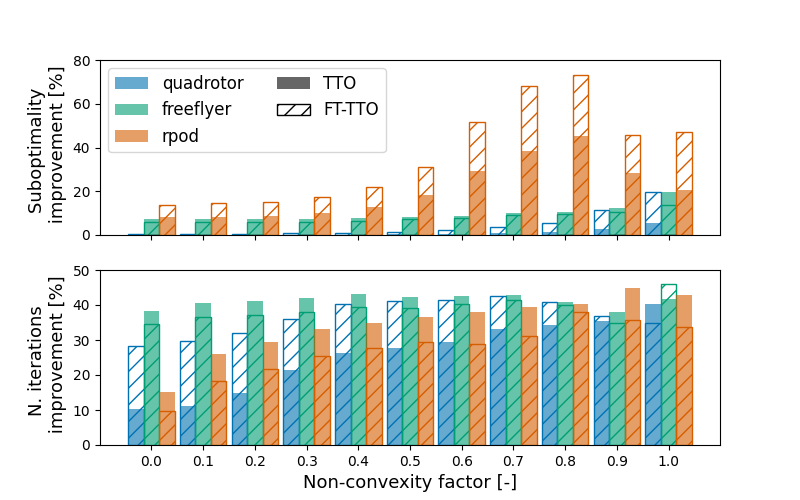

In [9]:
plt.style.use('seaborn-v0_8-colorblind')
desampl = 5
categories = ctgs0_4_mean[0][::desampl]
values11 = 100*(1-mean_costs_list_4_mean[0]['scp-cvx'][:len(ctgs0_4_mean[i]):desampl])  # First set of values
values21 = 100*(1-mean_costs_list_4_mean[1]['scp-cvx'][:len(ctgs0_4_mean[i]):desampl])   # Second set of values
values31 = 100*(1-mean_costs_list_4_mean[2]['scp-cvx'][:len(ctgs0_4_mean[i]):desampl])  # Third set of values
values12 = 100*(1-mean_costs_list_4_mean[0]['scp-DT'][:len(ctgs0_4_mean[i]):desampl])  # First set of values
values22 = 100*(1-mean_costs_list_4_mean[1]['scp-DT'][:len(ctgs0_4_mean[i]):desampl])   # Second set of values
values32 = 100*(1-mean_costs_list_4_mean[2]['scp-DT'][:len(ctgs0_4_mean[i]):desampl])  # Third set of values
values13 = 100*(1-mean_costs_list_4_mean[0]['scp-dag'][:len(ctgs0_4_mean[i]):desampl])  # First set of values
values23 = 100*(1-mean_costs_list_4_mean[1]['scp-dag'][:len(ctgs0_4_mean[i]):desampl])   # Second set of values
values33 = 100*(1-mean_costs_list_4_mean[2]['scp-dag'][:len(ctgs0_4_mean[i]):desampl])  # Third set of values
x = np.arange(len(categories))  # X-axis positions for each category
width = 0.3  # Width of each bar
ll = 1.

fig, ax_sub = plt.subplots(2,1,figsize=(8,5))
ax = ax_sub[0]
ax.bar(x - 1.*width, values12, width, label=case_study[0], color='C0', alpha=0.6)
ax.bar(x - 1.*width, values13, width, color='none', linewidth=ll, edgecolor='C0', hatch='//', alpha=1)
ax.bar(x - 0*width, values22, width, label=case_study[1], color='C1', alpha=0.6)
ax.bar(x + 0*width, values23, width, color='none', linewidth=ll, edgecolor='C1', hatch='//', alpha=1)
ax.bar(x + 1.*width, values32, width, label=case_study[2], color='C2', alpha=0.6)
ax.bar(x + 1.*width, values33, width, color='none', linewidth=ll, edgecolor='C2', hatch='//', alpha=1)
ax.bar(x - 0*width, 0*values12, width, label='TTO', color='black', alpha=0.6)
ax.bar(x - 0*width, 0*values13, width, label='FT-TTO', linewidth=ll, color='none', edgecolor='black', hatch='//', alpha=1)

ax.set_xticks(x)

ax.set_xticklabels([])
ax.set_ylim([0,80])
ax.set_ylabel('Suboptimality \n improvement [%]', fontsize=13)
ax.legend(fontsize=12, ncol=2)

desampl = 5
categories = ctgs0_4_mean[0][::desampl]
values11 = 100*(1-mean_iter_list_4_mean[0]['scp-cvx'][:len(ctgs0_4_mean[i]):desampl])  # First set of values
values21 = 100*(1-mean_iter_list_4_mean[1]['scp-cvx'][:len(ctgs0_4_mean[i]):desampl])   # Second set of values
values31 = 100*(1-mean_iter_list_4_mean[2]['scp-cvx'][:len(ctgs0_4_mean[i]):desampl])  # Third set of values
values12 = 100*(1-mean_iter_list_4_mean[0]['scp-DT'][:len(ctgs0_4_mean[i]):desampl])  # First set of values
values22 = 100*(1-mean_iter_list_4_mean[1]['scp-DT'][:len(ctgs0_4_mean[i]):desampl])   # Second set of values
values32 = 100*(1-mean_iter_list_4_mean[2]['scp-DT'][:len(ctgs0_4_mean[i]):desampl])  # Third set of values
values13 = 100*(1-mean_iter_list_4_mean[0]['scp-dag'][:len(ctgs0_4_mean[i]):desampl])  # First set of values
values23 = 100*(1-mean_iter_list_4_mean[1]['scp-dag'][:len(ctgs0_4_mean[i]):desampl])   # Second set of values
values33 = 100*(1-mean_iter_list_4_mean[2]['scp-dag'][:len(ctgs0_4_mean[i]):desampl])  # Third set of values
x = np.arange(len(categories))  # X-axis positions for each category
width = 0.3  # Width of each bar

ax2 = ax_sub[1]
ax2.bar(x - 1.*width, values12, width, label=case_study[0], color='C0', alpha=0.6)
ax2.bar(x - 1.*width, values13, width, color='none', linewidth=ll, edgecolor='C0', hatch='//', alpha=1)
ax2.bar(x - 0*width, values22, width, label=case_study[1], color='C1', alpha=0.6)
ax2.bar(x + 0*width, values23, width, color='none', linewidth=ll, edgecolor='C1', hatch='//', alpha=1)
ax2.bar(x + 1.*width, values32, width, label=case_study[2], color='C2', alpha=0.6)
ax2.bar(x + 1.*width, values33, width, color='none', linewidth=ll, edgecolor='C2', hatch='//', alpha=1)

ax2.set_xticks(x)

xticklabels = [str(x_i/10) for x_i in x]#['$\geq$'+str(x_i/10) for x_i in x]
ax2.set_xticklabels(xticklabels)
ax2.set_xlabel('Non-convexity factor [-]', fontsize=13)
ax2.set_ylim([0,50])
ax2.set_ylabel('N. iterations \n improvement [%]', fontsize=13)

fig.savefig('open_loop_results_'+str(case_study[0][0]+case_study[1][0]+case_study[2][0])+'.svg')

plt.show()